In [1]:
# 이진 분류와 다범주 분류

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# 분류기 이름 -> (선 스타일, 분류기 인스턴스)
CLASS_MAP = {
    'Logistic Regression':
    ('-', LogisticRegression()),
    'Naive Bayes':
    ('--', GaussianNB()),
    'Decision Tree':
    ('.-', DecisionTreeClassifier(max_depth=5)),
    'Random Forest':
    (':', RandomForestClassifier(
    max_depth = 5, n_estimators = 10, max_features = 1)),
}

ds = sklearn.datasets.load_iris()
df = pd.DataFrame(ds['data'],columns = ds['feature_names'])
code_species_map = dict(zip(range(3),ds['target_names']))
df['species'] = [code_species_map[c] for c in ds['target']]

# 데이터프레임의 행을 학습/시험셋으로 나눈다.
X, Y = df[df.columns[:3]], (df['species']=='virginica')
X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size = .8)

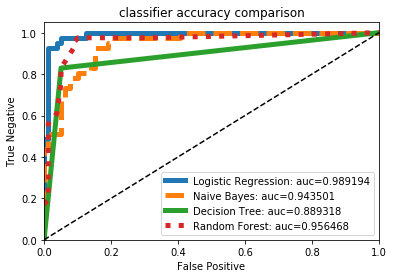

In [8]:
for name, (line_fmt, model) in CLASS_MAP.items():
    model.fit(X_train, Y_train)
    # 열마다 True/False 예측값을 저장한다.
    preds = model.predict_proba(X_test) # 모양: (120,2)
    pred = pd.Series(preds[:,1])
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    auc_score = auc(fpr, tpr)
    label = '%s: auc=%f' % (name, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth = 5, label=label)

plt.legend(loc="lower right")
plt.title('classifier accuracy comparison')
plt.plot([0,1],[0,1],'k--') # 비교를 위해 x=y 라인 추가
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Negative')
plt.show()

In [12]:
# 결정트리
# 트리의 최대 높이를 너무 크게 설정하면 잎사귀 노드마다 아주 적은 데이터 표본만 포함
# from sklean.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(max_depth=5)
# clf.fit(train[indep_cols], train.breed)
# predictions = clf.predict(test[indep_cols])

In [13]:
# 랜덤포레스트
# 각기 다른 학습 데이터를 이용해 학습한 결정 트리를 모아놓은 분류기
# from sklearn.tree import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
# clf.fit(train[indep_cols], train.breed)
# predictions = clf.predict(test[indep_cols])

In [ ]:
# 서포트 벡터 머신 (2진분류)
# 커널 SVM은 원본 데이터를 구분하기 좋도록 변환해주는 함수를 찾는다.
# 커널 함수는 x,y에 대칭이어야 한다. 즉 모든 x,y에 대해 k(x,y) = k(y,x)가 성립해야한다.